### Karolina Źróbek
___

# First known Matrices: Tibetan *Thangka's*

<div style="display: flex;">
    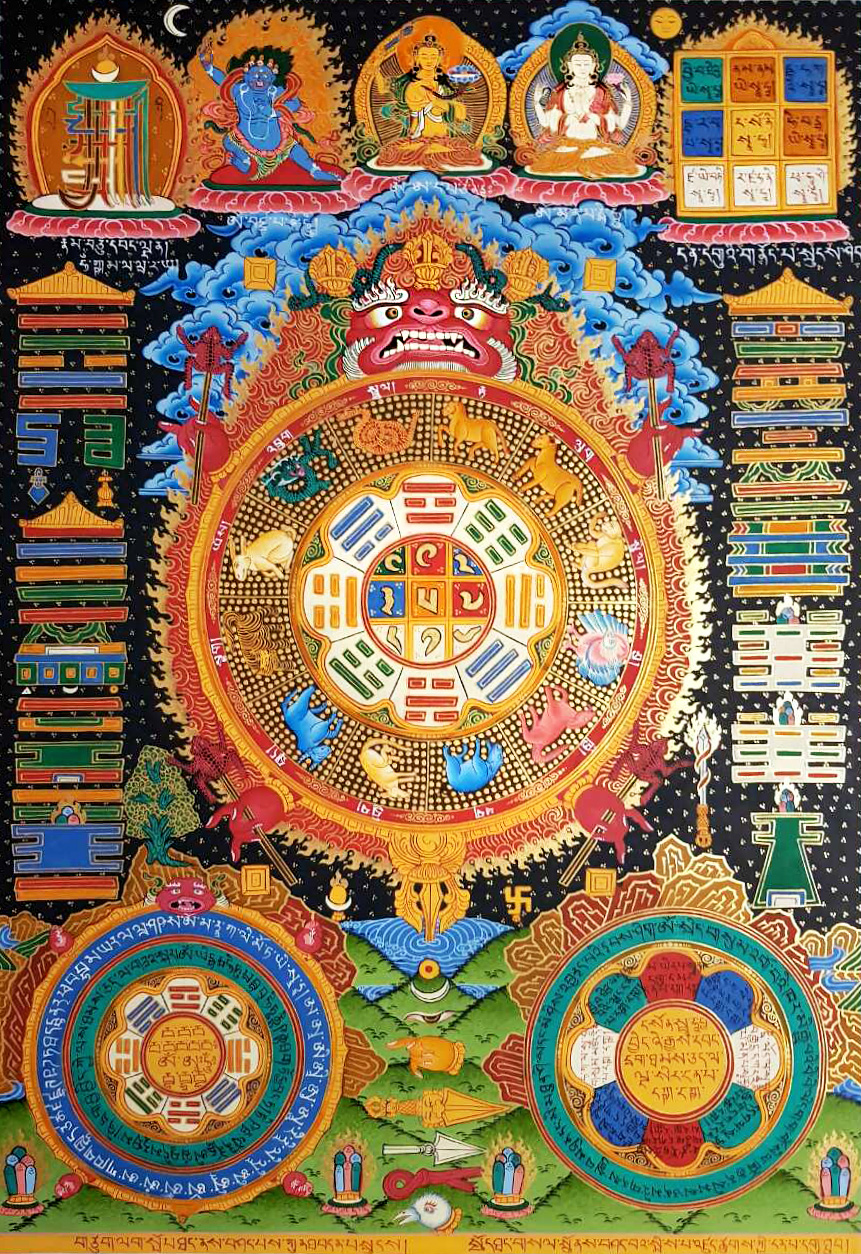
    <div style="width:auto;height:500px; margin-left: 10px;"> A thangka is a Tibetan Buddhist painting on cotton or silk. The intricate thangka painting on the left is both a Tibetan calendar and an astrological diagram.

The central figure is a turtle laying on her back. **The central circle is divided into nine areas containing the Nine Sacred Numbers** surrounded by the eight symbols of Chinese Taoist cosmology representing the fundamental principles of reality.
The following circle represent the sixty years cycle divided in twelve areas in which are depicted twelve animals: dragon, snake, horse, sheep, monkey, bird, dog, pig, mouse, bull, tiger and rabbit.

The deities depicted on the top are from left to right: Vajrapani, Manjushri and Chenrezig.
The symbol on the top left is the Kalachakra script representing the wheel of time.
All the other symbols are representations of the astrological chart and Tibetan cosmology.
This diagram is important to calculate monthly and yearly horoscopes and it is also considered a talisman that attracts positive energy and brings good fortune.

The numbers in the center can be decifered using this table:

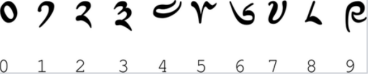

The matrix that will be a subject of this report can be decifered as:

$M = \begin{bmatrix}
4 & 9 & 2 \\
3 & 5 & 7 \\
8 & 1 & 6
\end{bmatrix}$

</div>
</div>


In [5]:
import numpy as np
from numpy import linalg

values = [4, 9, 2, 3, 5, 7, 8, 1, 6]
matrix = np.array(values).reshape(3, 3)
print(matrix)


[[4 9 2]
 [3 5 7]
 [8 1 6]]


## Matrix Norms

A matrix norm is a metric or way of measuring the "size" or "length" of a matrix.
Different norms for the tibetan matrix will be calculated step-by-step and also compared with results returend by `numpy.linalg.norm` function.

### 1-Norm (Column Sum Norm)

The 1-norm of a matrix \( A \) is given by the maximum absolute column sum:

$\|A \|_{1} = \max_{1 \leq j \leq n} \sum_{i=1}^{m} |a_{ij}|$

In [24]:
def one_norm(matrix):
    num_rows, num_cols = len(matrix), len(matrix[0])
    column_sums = [0] * num_cols  # Initialize column sums list
    
    # Iterate over each element in the matrix
    for col in range(num_cols):
        for row in range(num_rows):
            # Add the absolute value of the element to the corresponding column sum
            column_sums[col] += abs(matrix[row][col])
    
    # Return the maximum column sum, which is the 1-norm
    return max(column_sums)

l1_norm = one_norm(matrix)
print( "\t1-norm(M) = ", l1_norm)

l1_norm_np = linalg.norm(matrix, ord=1)
print( "(Numpy): 1-norm(M) = ", l1_norm_np)

	1-norm(M) =  15
(Numpy): 1-norm(M) =  15.0


### 2-Norm (Frobenius Norm)

The 2-norm of a matrix \( A \) is given by:

$
\| A \|_{2} = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2}
$

In [28]:
def two_norm(matrix):
    num_rows, num_cols = len(matrix), len(matrix[0])
    sum_of_squares = 0
    
    # Iterate over each element in the matrix and sum the squares of all elements
    for row in range(num_rows):
        for col in range(num_cols):
            sum_of_squares += matrix[row][col] ** 2
    
    # Return the square root of the sum of squares, which is the 2-norm
    return sum_of_squares ** 0.5

l2_norm = two_norm(matrix)
print( "\tFrobenius-norm(M) = ", l2_norm)

fro_norm_np = linalg.norm(matrix, 'fro')
print( "(Numpy): Frobenius-norm(M) = ", fro_norm_np)

	Frobenius-norm(M) =  16.881943016134134
(Numpy): Frobenius-norm(M) =  16.881943016134134


### Maximum Norm (Infinity Norm, Chebyshev Norm or Row Sum Norm)

The maximum norm of a matrix \( A \) is given by:

$
\| A \|_{\infty} = \max_{1 \leq i \leq m} \sum_{j=1}^{n} |a_{ij}|
$

In [31]:
def infinity_norm(matrix):
    max_row_sum = 0
    
    # Iterate over each row in the matrix and calculate the sum of absolute values
    for row in matrix:
        row_sum = sum(map(abs, row))
        max_row_sum = max(max_row_sum, row_sum)
    
    # Return the maximum row sum, which is the infinity norm
    return max_row_sum

inf_norm = infinity_norm(matrix)
print( "\tinf-norm(M) = ", inf_norm)

inf_norm = linalg.norm(matrix, np.inf)
print( "(Numpy): inf-norm(M) = ", inf_norm)

	inf-norm(M) =  15
(Numpy): inf-norm(M) =  15.0


### p-Norm (Generalization)

In generalized form a p-norm can be calculated as follows:

$
\| A \|_{p} = \sqrt[p]{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^p}
$

In [34]:
def p_norm(matrix, p):
    num_rows, num_cols = len(matrix), len(matrix[0])
    column_sums = [0] * num_cols  # Initialize column sums list
    
    # Iterate over each element in the matrix
    for col in range(num_cols):
        for row in range(num_rows):
            # Add the absolute value of the element raised to the power of p to the corresponding column sum
            column_sums[col] += abs(matrix[row][col]) ** p
    
    # Return the maximum column sum raised to the power of 1/p, which is the p-norm
    return max(column_sums) ** (1/p)

## Condition Number

**The condition number** of a function measures how much the output value of the function can change for a small change in the input argument. This is used to measure how sensitive a function is to changes or errors in the input, and how much error in the output results from an error in the input.

Regarding matrices, take for example:

$ Ax = b $

One should think of the condition number as being (very roughly) the rate at which the solution x will change with respect to a change in b. Thus, **if the condition number is large, even a small error in b may cause a large error in x**. On the other hand, if the condition number is small, then the error in x will not be much bigger than the error in b.

Conditioning is a **property of the matrix**, not the algorithm or floating-point accuracy of the computer used to solve the corresponding system.

Following condition numbers will be calculated for the tibetan matrix:

$cond(A) = \| A \|_{1}\| A^{-1} \|_{1}$

$cond_{2}(A) = \| A \|_{2}\| A^{-1} \|_{2}$

$cond_{\infty}(A) = \| A \|_{\infty}\| A^{-1} \|_{\infty}$


Additionally condition number of degree p can be generally calculated using this formula:

$cond_{p}(A) = \| A \|_{p}\| A^{-1} \|_{p}$

In [33]:
print( "cond(M) = ", one_norm(matrix)*one_norm(linalg.inv(matrix)))
print( "cond_2(M) = ", two_norm(matrix)*two_norm(linalg.inv(matrix)))
print( "cond_inf(M) = ", infinity_norm(matrix)*infinity_norm(linalg.inv(matrix)))

cond(M) =  5.333333333333333
cond_2(M) =  5.563646885511936
cond_inf(M) =  5.333333333333333
